In [1]:
import pandas as pd
import numpy as np
from sympy import *
import math
from matplotlib import pyplot as plt

# Normalkraftstab unter Eigenlast
## Aufgabenstellung
Gegeben ist ein hängender Normalkraftstab mit zylindrischem Querschnitt unter Eigenlast.


![](Aufgabenstellung.png)

a)
Zunächst verschaffen wir uns die exakte Lösung für das dargestellte Normalkraftproblem mit konstanter Dehnsteifigkeit und linear anwachsender Linienlast:

1) Lösen Sie die Differentialgleichung des Normalkraftstabes $(EA u(x)')'=-q_x(x)$ 
mit den Randbedingungen 
$u(0)=0$ und
$u'(L)=0$.

2) Stellen Sie den Verlauf von $u(x)$ grafisch dar mit dem "Plot[]" Befehl.

3) Ermitteln Sie die Normalkraft $N(x)$ (über $N(x)= E A u'(x))$  sowie den Spannungsverlauf $\sigma(x)$ und stellen den Verlauf üben den Stab dar.

b)
Modellieren Sie das Problem in ANSYS und berechnen Sie ebenso den
Verschiebungsverlauf $u(x)$ und
Spannungsverlauf $\sigma(x)$.
Vergleichen Sie die Maximalwerte und Verläufe mit den exakten Lösungen.  Variieren Sie die Elementanzahl im Modell.

Geg.:\
$g=9,81\,$m/s^2\
$\rho=7850\,$kg/m^3\
$E=200.000\,$GPa\
$A=2500\pi$\
$L=500\,$mm

### Lösung a)

In [2]:
x,g,Em,rho,A,L =symbols('x g Em rho A L')

In [3]:
data=[(A,50**2*pi),(L,500),(rho,7.85*10**(-6)),(Em,200000),(g,9.81)]

In [4]:
u=symbols('u',cls=Function)

In [5]:
dglg=Eq(Em*A*u(x).diff(x,2),-A*g*rho)
dglg

Eq(A*Em*Derivative(u(x), (x, 2)), -A*g*rho)

In [6]:
rb1=Eq(u(0),0)
rb1

Eq(u(0), 0)

In [7]:
du=u(x).diff(x)

In [8]:
u=dsolve(dglg,u(x))
u

Eq(u(x), C1 + x*(C2*Em - g*rho*x/2)/Em)

Die Konstanten können über die Randbedingungen mit `solve` bestimmt werden

In [9]:
bed1 = u.rhs.subs(x,0) - 0
bed2 = u.rhs.diff(x).subs(x,L) - 0
C = solve([bed1,bed2])
C

{C1: 0, C2: L*g*rho/Em}

In [10]:
u = u.subs(C)
u

Eq(u(x), x*(L*g*rho - g*rho*x/2)/Em)

Die maximale Auslenkung ist dann

In [11]:
u.subs(data).subs(x,L.subs(data))

Eq(u(500), 4.81303125e-5)

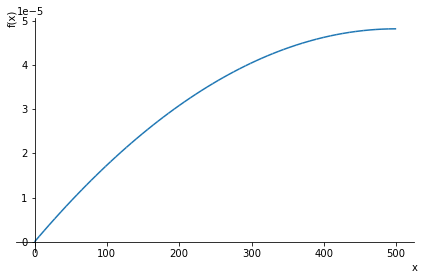

In [12]:
ux = Lambda(x, u.rhs.subs(data))
plot(ux(x),(x,0,L.subs(data)))

Die Normalkraft errechnet sich aus der Ableitung der Verschiebungsfunktion

In [13]:
Nex=Lambda(x,Em*A*u.rhs.diff(x))
Nex

Lambda(x, A*Em*(-g*rho*x/(2*Em) + (L*g*rho - g*rho*x/2)/Em))

Die resultierende Kraft an der Lagerung ergibt sich zu

In [14]:
N(Nex(0).subs(data))

302.411672329962

Damit ergibt sich die Spannung aus

In [15]:
Sigex=Lambda(x,Nex(x)/A)
Sigex(x)

Em*(-g*rho*x/(2*Em) + (L*g*rho - g*rho*x/2)/Em)

Und die grafische Darstellung des Spannungsverlaufes

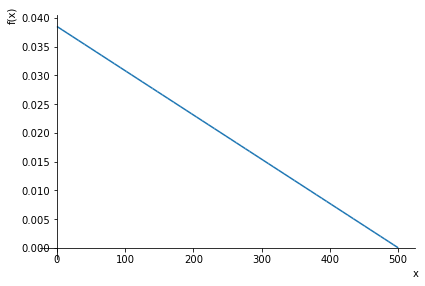

In [16]:
plot(Sigex(x).subs(data),(x,0,L.subs(data)))